In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [10]:
trades.head()
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [12]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [15]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'],errors='coerce')

In [16]:
trades['Timestamp IST'].isna().sum()

131999

In [17]:
trades = trades.dropna(subset=['Timestamp IST'])

In [18]:
trades.shape

(79225, 16)

In [20]:
trades['date'] = trades['Timestamp IST'].dt.date
trades[['Timestamp IST','date']].head()

,Timestamp IST,date
0,2024-02-12 22:50:00,2024-02-12
1,2024-02-12 22:50:00,2024-02-12
2,2024-02-12 22:50:00,2024-02-12
3,2024-02-12 22:50:00,2024-02-12
4,2024-02-12 22:50:00,2024-02-12


In [21]:
sentiment['date']=pd.to_datetime(sentiment['date']).dt.date

In [25]:
merged_df = pd.merge(
    trades,
    sentiment[['date','classification']],
    on='date',
    how='left'
)

In [26]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [27]:
merged_df['classification'].value_counts(dropna=False)

classification
NaN              43361
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

In [28]:
merged_df = merged_df.dropna(subset=['classification'])

In [29]:
merged_df.shape

(35864, 18)

In [33]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'],errors='coerce')

In [34]:
merged_df['Closed PnL'].isna().sum()

0

In [37]:
pnl_by_sentiment = (merged_df.groupby('classification')['Closed PnL']
                    .mean()
                    .sort_values(ascending=False))
pnl_by_sentiment

classification
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Extreme Fear       1.891632
Name: Closed PnL, dtype: float64

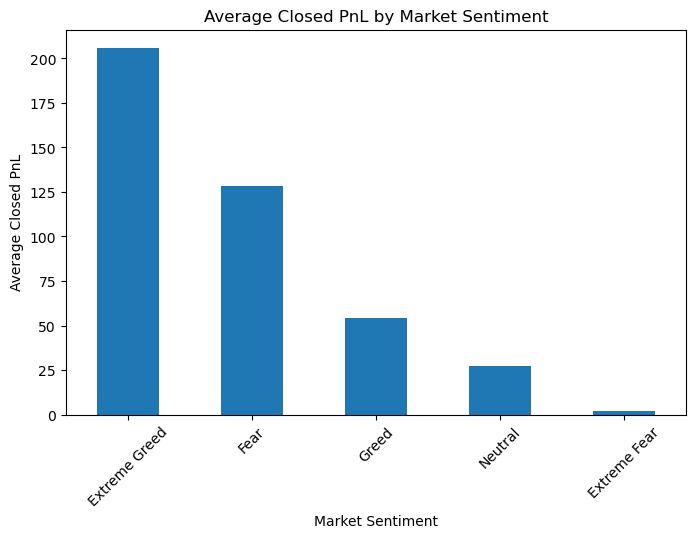

In [39]:
plt.figure(figsize=(8,5))
pnl_by_sentiment.plot(kind='bar')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.show()  

In [40]:
merged_df['is_profit'] = merged_df['Closed PnL'] > 0

In [41]:
win_rate = merged_df.groupby('classification')['is_profit'].mean()*100
win_rate

classification
Extreme Fear     29.277730
Extreme Greed    55.328233
Fear             38.178672
Greed            43.570670
Neutral          49.492017
Name: is_profit, dtype: float64

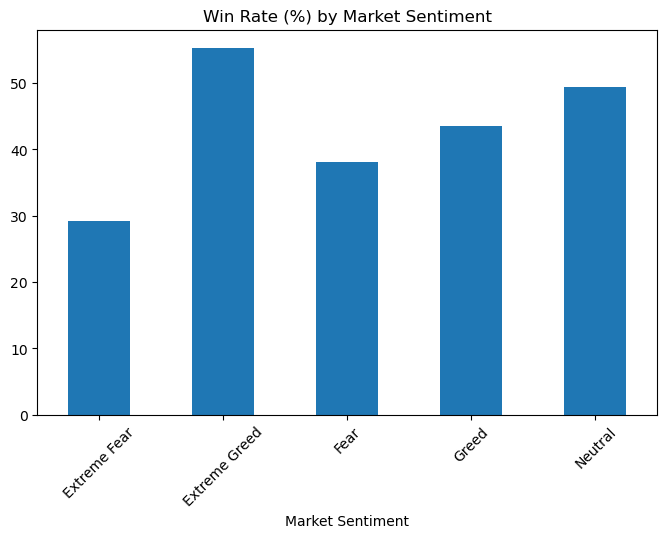

In [42]:
plt.figure(figsize=(8,5))
win_rate.plot(kind='bar')
plt.title('Win Rate (%) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45)
plt.show()

In [43]:
merged_df['Side'].value_counts()

Side
SELL    19301
BUY     16563
Name: count, dtype: int64

In [44]:
buy_sell_counts = merged_df.groupby(['classification','Side']).size().unstack()
buy_sell_counts

Side,BUY,SELL
classification,,
Extreme Fear,1168,1158
Extreme Greed,1661,3960
Fear,7307,6562
Greed,5407,5885
Neutral,1020,1736


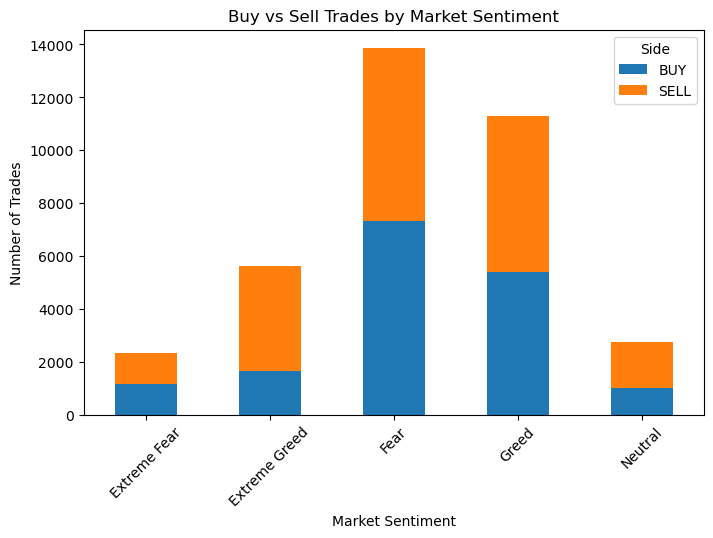

In [45]:
buy_sell_counts.plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Buy vs Sell Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.show()

In [50]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [51]:
daily_pnl = merged_df.groupby(['date','classification'])['Closed PnL'].mean().unstack()
daily_pnl.head()

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
date,,,,,
2023-01-05,NaN,NaN,0.0,NaN,NaN
2023-05-12,NaN,NaN,NaN,NaN,0.0
2024-01-01,NaN,NaN,NaN,-7.196192,NaN
2024-01-02,NaN,NaN,NaN,0.000000,NaN
2024-01-03,NaN,NaN,NaN,60.176945,NaN


In [52]:
daily_pnl = daily_pnl.fillna(0)
daily_pnl.head()

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
date,,,,,
2023-01-05,0.0,0.0,0.0,0.000000,0.0
2023-05-12,0.0,0.0,0.0,0.000000,0.0
2024-01-01,0.0,0.0,0.0,-7.196192,0.0
2024-01-02,0.0,0.0,0.0,0.000000,0.0
2024-01-03,0.0,0.0,0.0,60.176945,0.0


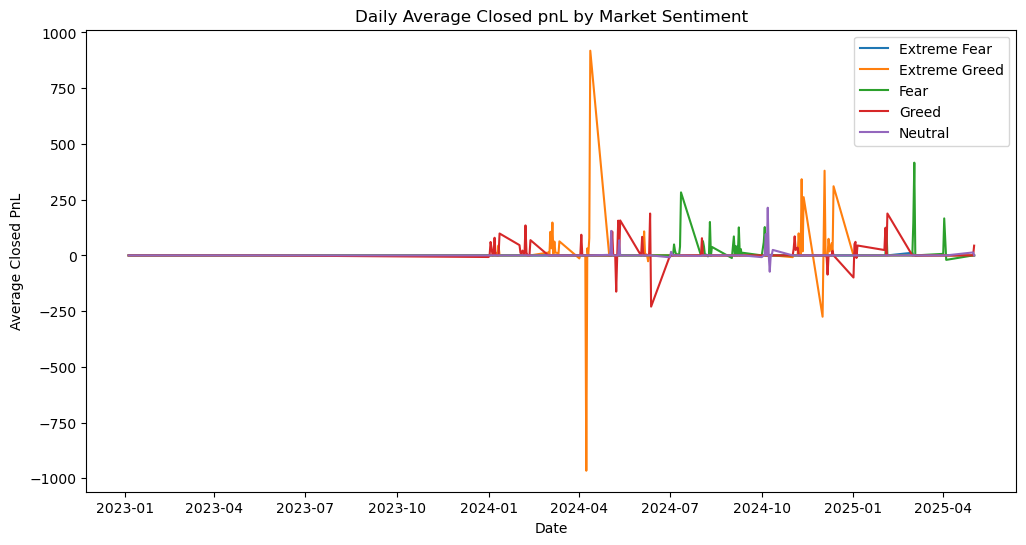

In [53]:
plt.figure(figsize=(12,6))
for sentiment in daily_pnl.columns:
    plt.plot(daily_pnl.index,daily_pnl[sentiment],label=sentiment)
plt.title('Daily Average Closed pnL by Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.legend()
plt.show()